### Projeto de web scraping e automação com o beautiful soup

In [ ]:
#Primeira etapa = importar as bibliotecas necessárias:
from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0
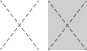
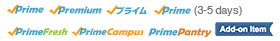

In [2]:
#Estabelecendo conexão com o site
Url = 'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1'   #Url do site base para nossa pesquisa
headers = {"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
    "Accept-Encoding": "gzip, deflate, br",   
    "Upgrade-Insecure-Requests": "1", 
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36", 
    "DNT":"1",
    "Connection":"close"}

#informações básicas do navegador, retiradas do site https://httpbin.org/get, que nos permite visualizar essas infos

page = requests.get(Url, headers=headers)    #definição básica da página

soup1 = BeautifulSoup(page.content, 'html.parser')       #obtenção do conteúdo da página em html

print(soup1)           #Vamos ter um primeiro look de como vem a informação



<!DOCTYPE doctype html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var
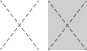
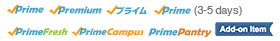

In [3]:
#Claramente, a informação do site vem uma bagunça, precisaremos refiná-la
soup2 = BeautifulSoup(soup1.prettify(),'html.parser')

#usaremos a função prettify do bs4 como ponto de partida

print(soup2)

In [4]:
#A formatação melhorou um pouco, porém agora especificaremos quais informações da página queremos, já que não será tudo da página

title = soup2.find(id='productTitle').get_text()
print(title)



                   Funny Got Data MIS Data Systems Business Analyst T-Shirt
                  


In [5]:
price = soup2.find(id='priceblock_ourprice').get_text()
print(price)


                    $16.99
                   


In [6]:
#Queremos somente a informação referente ao preço, vamos refiná-la
price = price.strip()[1:]
title = title.strip()

print(price)
print(title)

16.99
Funny Got Data MIS Data Systems Business Analyst T-Shirt


In [7]:
hoje = datetime.date.today()

In [8]:
#Agora, começaremos as etapas referentes ao export das informações para planilhas
import csv

header = ['Title','Price','Date']
dados  = [title, price, hoje]

with open('Amazondados.csv','w', newline='', encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(header)
  writer.writerow(dados)

In [9]:
#O arquivo csv foi criado, vamos verificá-lo
import pandas as pd
dados = pd.read_csv('/content/Amazondados.csv')

In [10]:
dados

,Title,Price,Date
0,Funny Got Data MIS Data Systems Business Analy...,16.99,2021-08-26


In [12]:
#Agora, em vez de criar o arquivo, iremos adicionar itens a ele

In [12]:
with open('Amazondados.csv','a+', newline='', encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(header)
  writer.writerow(dados)

In [ ]:
#Podemos criar uma função com o objetivod de realizar essa operação periodicamente
def checar_preco():
  Url = 'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1'   #Url do site base para nossa pesquisa
  headers = {"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
    "Accept-Encoding": "gzip, deflate, br",   
    "Upgrade-Insecure-Requests": "1", 
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36", 
    "DNT":"1",
    "Connection":"close"}
  page = requests.get(Url, headers=headers)    

  soup1 = BeautifulSoup(page.content, 'html.parser') 
  soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')
  title = soup2.find(id='productTitle').get_text()
  price = soup2.find(id='priceblock_ourprice').get_text()
  price = price.strip()[1:]
  title = title.strip()

  import datetime
  hoje = datetime.date.today()
  
  import csv
  header = ['Title','Price','Date']
  dados = [title,price,hoje]

  with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [12]:
#Se quisermos executar o script para verificar preços a cada intervalo definido de tempo
while(True):
    check_price()
    time.sleep(86400)
#com um tempo de intervalo de um dia, em segundos


In [12]:
#Função nova, para enviar email para mim mesmo, monitorando o preço
def email():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('gabrielfogacaeq@gmail.com','xxxxxxxxxxxxxx')    #Falta a senha para conseguir mandar o e-mail
    

    subject = "O preço da camiseta atingiu 15$"
    body = "Alex, This is the moment we have been waiting for. Now is your chance to pick up the shirt of your dreams. Don't mess it up! Link here: https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data+analyst+tshirt&qid=1626655184&sr=8-3"
   
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'gabrielfogacaeq@gmail.com',
        msg
     
    )

In [15]:
#Definindo um alerta para preço:
if (price<='15'):
  email()